In [27]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 20,15

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [86]:
ori_df = pd.read_csv('./통합데이터_추가수정(사업체수 추가).csv', encoding='euc-kr')
ori_df.head(5)

,역사명,역위도,역경도,일평균승하차(명),상가 면적,거주자수,남여비율,1인 가구수 레벨,1인 가구수(세대),사업체수,20~40대 인구 수 레벨,고속버스 터미널,기차역,여객 터미널,주변 관광지,주변 대학교,일평균(원)
0,가야역,35.155883,129.042817,5799,11.0,25217,0.95,83,6291,49,57,NaN,1.0,NaN,0,0,1926082
1,감전역,35.155528,128.991146,6107,10.0,12825,1.12,56,5461,57,31,NaN,NaN,NaN,0,0,2535118
2,강서구청,35.211247,128.981756,4251,NaN,2076,1.22,26,4630,109,4,NaN,NaN,NaN,0,0,2029127
3,개금역,35.153284,129.020533,13621,37.0,27187,0.94,79,2501,36,65,NaN,NaN,NaN,0,1,4717075
4,거제(법원·검찰청),35.188589,129.073941,9546,16.0,27403,0.91,14,3093,114,13,NaN,NaN,NaN,0,1,3099526


In [87]:
df = ori_df[['역사명','일평균승하차(명)','1인 가구수(세대)','사업체수','일평균(원)']]
df

,역사명,일평균승하차(명),1인 가구수(세대),사업체수,일평균(원)
0,가야역,5799,6291,49,1926082
1,감전역,6107,5461,57,2535118
2,강서구청,4251,4630,109,2029127
3,개금역,13621,2501,36,4717075
4,거제(법원·검찰청),9546,3093,114,3099526
...,...,...,...,...,...
95,충렬사(안락),5398,1851,35,1117126
96,토성,13846,2110,7,6002230
97,하단,29080,4414,36,11010043
98,해운대역,18794,5075,80,8828608


In [88]:
df.isnull().sum()

역사명           0
일평균승하차(명)     0
1인 가구수(세대)    0
사업체수          0
일평균(원)        0
dtype: int64

In [31]:
df = df.fillna(0)
df.isnull().sum()

역사명           0
일평균승하차(명)     0
1인 가구수(세대)    0
사업체수          0
일평균(원)        0
dtype: int64

### 산점도

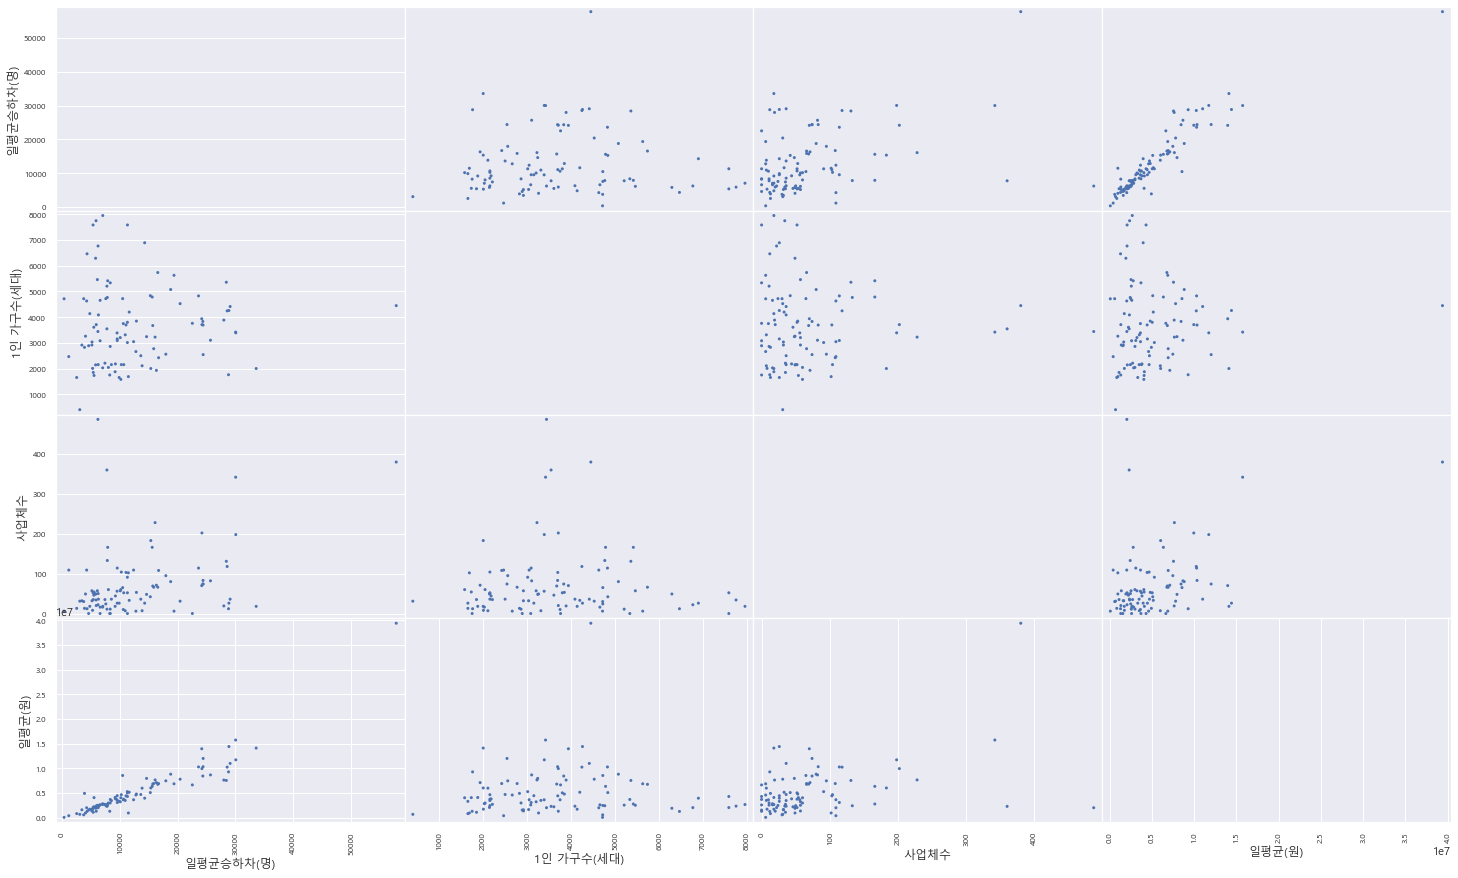

In [32]:
# 전체 변수와 일평균 수익 산점도
from pandas.plotting import scatter_matrix
scatter_matrix(df,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

#### 일평균 운행수익과 각 변수별 산점도

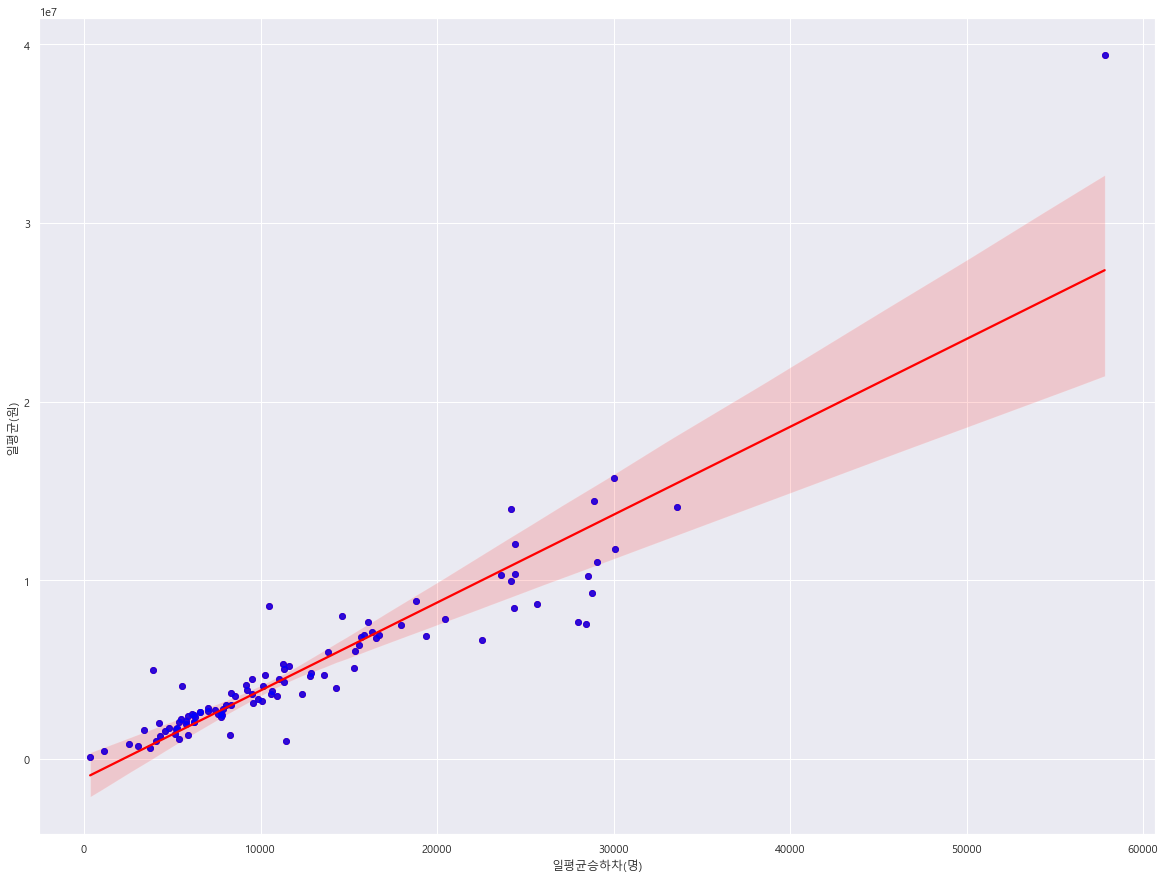

In [33]:
# 일평균 승하차와 일평균 수익 산점도
sns.regplot(x='일평균승하차(명)', y='일평균(원)', data=df, color="red")
plt.scatter(df[['일평균승하차(명)']], df[['일평균(원)']], alpha=0.8, color='blue')
plt.show()

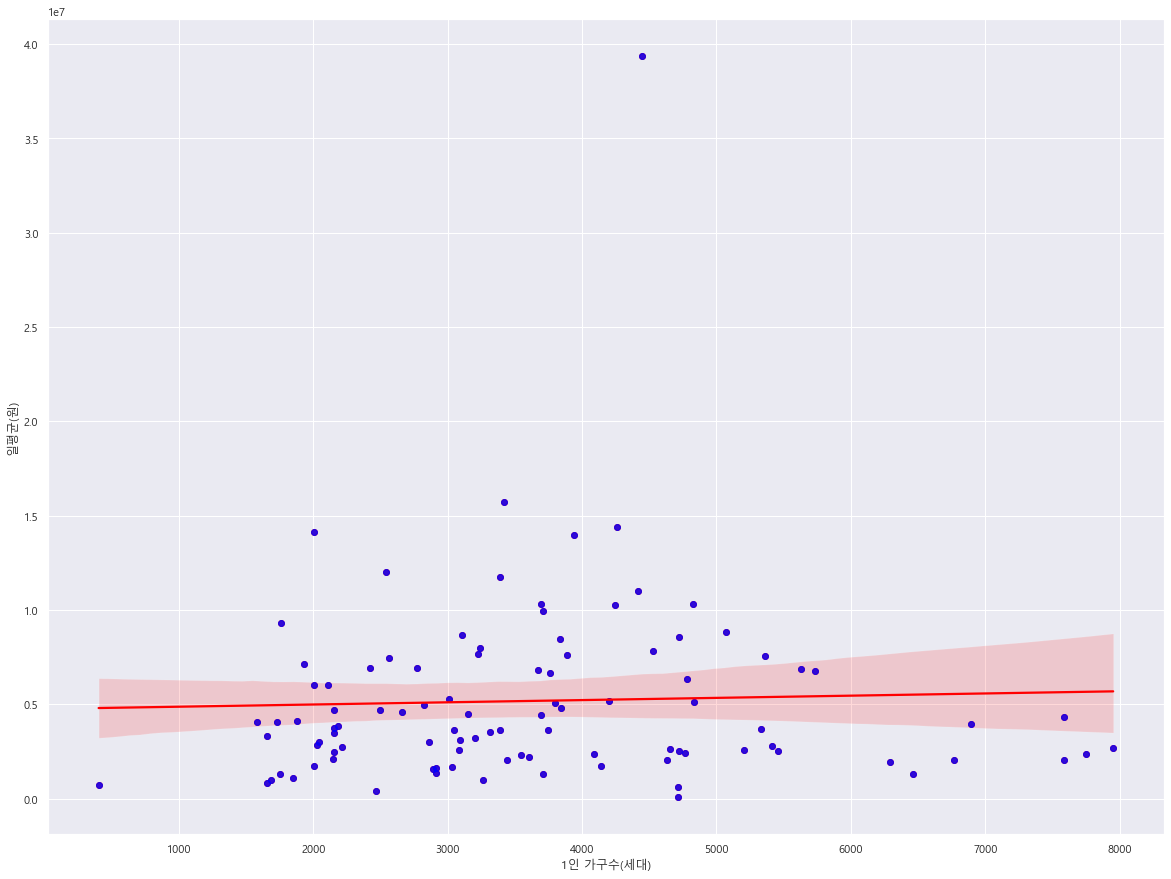

In [34]:
# 1인 가구수(세대)와 일평균 수익 산점도
sns.regplot(x='1인 가구수(세대)', y='일평균(원)', data=df, color="red")
plt.scatter(df[['1인 가구수(세대)']], df[['일평균(원)']], alpha=0.8, color='blue')
plt.show()

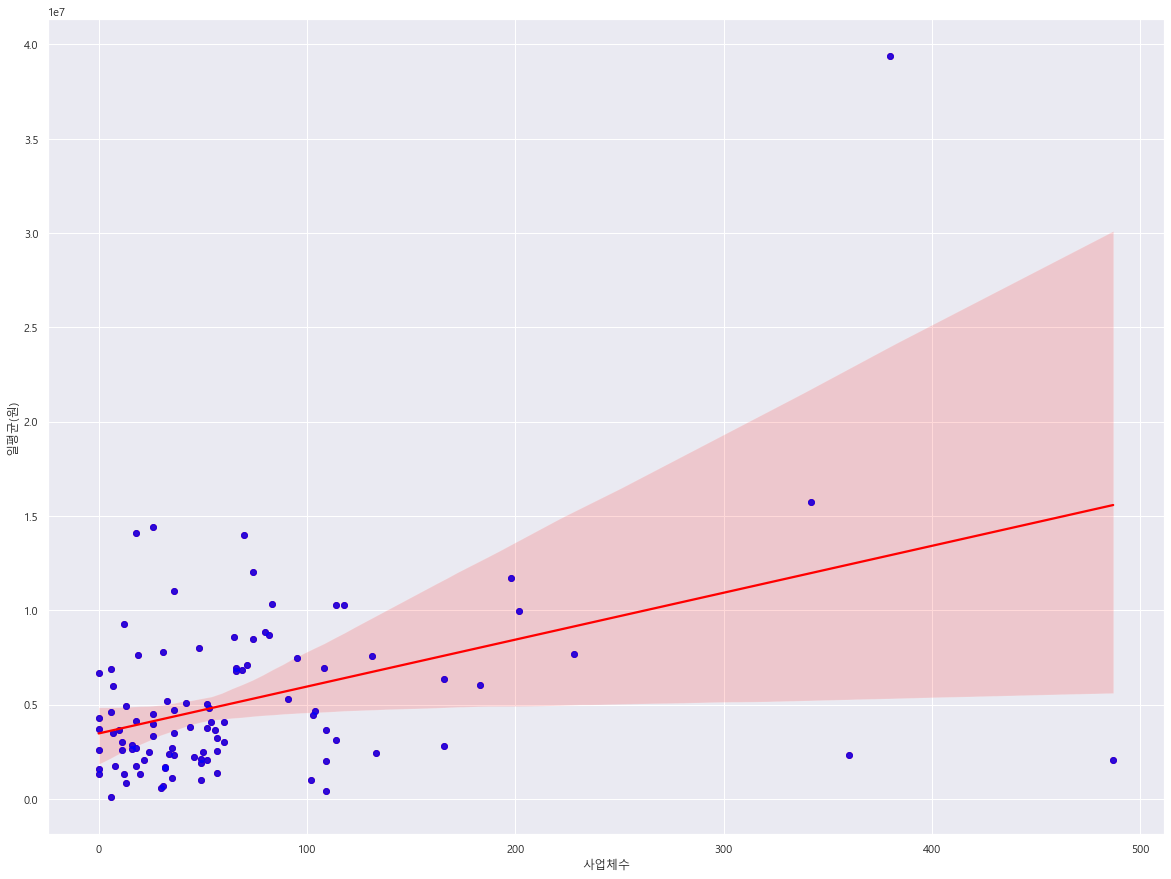

In [35]:
# 사업체수와 일평균 수익 산점도
sns.regplot(x='사업체수', y='일평균(원)', data=df, color="red")
plt.scatter(df[['사업체수']], df[['일평균(원)']], alpha=0.8, color='blue')
plt.show()

#### 상관계수 확인

0.1 이상은 비교해볼만 가치가 있다.\
(유의미한 결과가 있을 수 있다)

In [36]:
df_dr_corr = df.corr()
df_dr_corr

,일평균승하차(명),1인 가구수(세대),사업체수,일평균(원)
일평균승하차(명),1.000000,0.033473,0.355560,0.919696
1인 가구수(세대),0.033473,1.000000,-0.011647,0.036853
사업체수,0.355560,-0.011647,1.000000,0.420679
일평균(원),0.919696,0.036853,0.420679,1.000000


##### 히트맵 확인

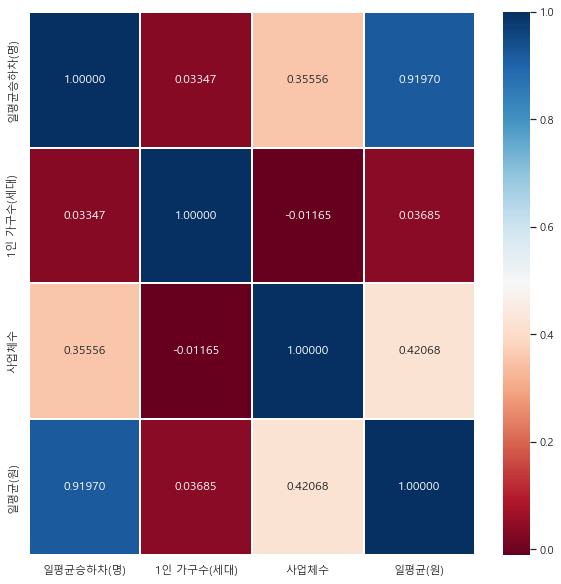

In [37]:
plt.figure(figsize=(10,10))
color_map = plt.cm.RdBu

sns.heatmap(df_dr_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

## statsmodels.formula.api을 통한 회귀분석

statsmodels.formula.api을 사용하면 회귀모델 공식을 먼저 작성한 후 공식에 따라 회귀분석을 시행한다.\
상수항 추가나 범주형 변수의 더미변수화를 자동으로 해결해주는 장점이 있다.

In [169]:
# ols 함수로 회귀분석을 실시
from statsmodels.formula.api import ols

In [170]:
a = df[["일평균(원)"]]
b = df[['일평균승하차(명)','1인 가구수(세대)','사업체수']]

In [171]:
res = ols('a~b', data=df).fit()

In [172]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      a   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     190.2
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           2.96e-40
Time:                        11:22:03   Log-Likelihood:                -1584.8
No. Observations:                 100   AIC:                             3178.
Df Residuals:                      96   BIC:                             3188.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.372e+06   5.52e+05     -2.486      0.0

## statsmodels.api을 통한 회귀분석

statsmodels.api을 통해서 회귀분석을 시행할 경우 별도로 독립변수에 상수항을 추가해줘야 한다.\
상수항을 추가하기 위해서는 statsmodels가 제공하는 add_constant API를 사용해주면 간단하다.

In [151]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [152]:
x = df[['일평균승하차(명)','1인 가구수(세대)','사업체수']]

In [153]:
y = df[['일평균(원)']]

In [20]:
# 테스트 훈련 데이터 분할
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

In [161]:
x=sm.add_constant(x)

In [166]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y,x)
fittedFullModel = fullModel.fit()

In [167]:
print(fittedFullModel.summary())

                            OLS Regression Results                            
Dep. Variable:                 일평균(원)   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     190.2
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           2.96e-40
Time:                        11:15:07   Log-Likelihood:                -1584.8
No. Observations:                 100   AIC:                             3178.
Df Residuals:                      96   BIC:                             3188.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.372e+06   5.52e+05     -2.486      0.0

In [21]:
# # Train the MLR / 회귀모델적합
# # OLS(Ordinary Least Squares)
# fullModel = sm.OLS(y_train,x_train)
# fittedFullModel = fullModel.fit()

In [22]:
# print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              294.6
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                    1.62e-38
Time:                        18:56:01   Log-Likelihood:                         -1116.1
No. Observations:                  70   AIC:                                      2238.
Df Residuals:                      67   BIC:                                      2245.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.930
- Adj. R-squared : 0.925
- P>[t] : 일평균승하차, 1인 가구수, 사업체 수만 유의미한 결과가 나옴

#### 선형 회귀

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [25]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.8711747785020669

In [26]:
multi_model.score(x_test, y_test)

0.7268469556284329

#### 예측

In [27]:
my_predict = mlr.predict(x_test)
my_predict

array([[ 1403294.83171699],
       [ 6855089.17918058],
       [ 1433543.28707821],
       [ 2283733.16451842],
       [  287963.4306119 ],
       [ 4323095.55425578],
       [ 3241465.83823297],
       [10835272.33051675],
       [ 1150826.37018429],
       [ 1610968.39750128],
       [ 2714638.06360466],
       [ 3991522.85534383],
       [ 1556906.03344896],
       [13201174.3859981 ],
       [ 4546921.33921795],
       [ 3845938.11231045],
       [ 3994645.58917299],
       [ 8626142.59321551],
       [ 1452290.17857002],
       [ 1746993.20488797],
       [11528332.4481592 ],
       [ 1782237.9388057 ],
       [ 3796646.98109334],
       [ 6556298.63280507],
       [12722049.20721564],
       [ 4687891.25998378],
       [ 3715940.64505935],
       [ 5208809.99468467],
       [ 1927263.73105596],
       [ 3201826.60950345]])

#### 시각화

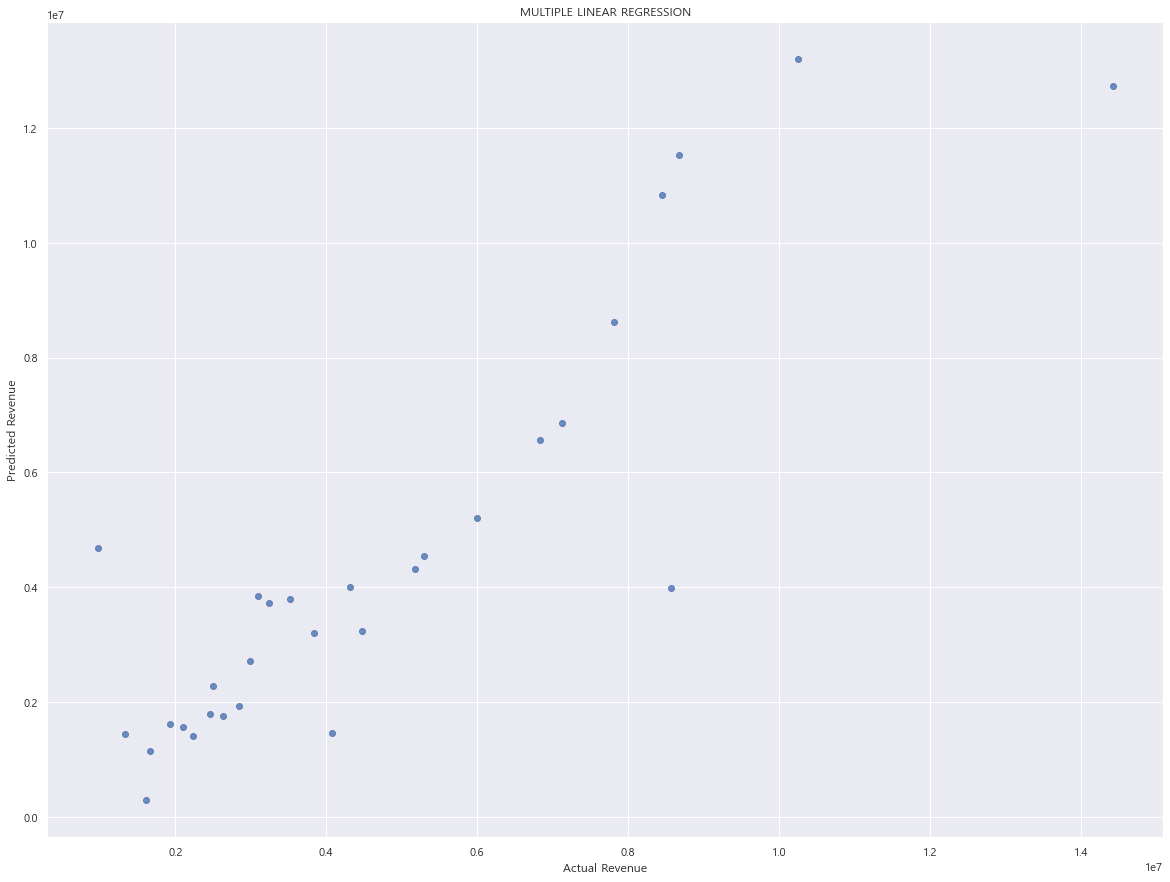

In [28]:
plt.figure(figsize=(20,15))
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

#### 상관계수 확인

In [29]:
print(mlr.coef_)

[[ 489.64323714   13.39394447 6817.08214865]]


## 다중 회귀(Multiple regression)

- 강의때 특성 공학과 규제 참고

In [38]:
x = df[['일평균승하차(명)','1인 가구수(세대)','사업체수']]

In [39]:
y = df["일평균(원)"]

In [40]:
# 넘파이 배열로 변환
arr_df = x.to_numpy()
arr_df

array([[ 5799,  6291,    49],
       [ 6107,  5461,    57],
       [ 4251,  4630,   109],
       [13621,  2501,    36],
       [ 9546,  3093,   114],
       [24395,  3694,    83],
       [16701,  2424,   108],
       [15271,  4835,    42],
       [22544,  3761,     0],
       [ 7021,  2029,    16],
       [ 5185,  3035,    32],
       [15857,  2774,    66],
       [ 5530,  1733,    54],
       [ 8248,  1752,     0],
       [ 3881,  2827,    13],
       [11471,  1689,   102],
       [ 3061,   404,    31],
       [ 9178,  1879,    18],
       [ 8016,  2046,    60],
       [10166,  1581,    60],
       [28802,  1762,    12],
       [ 8327,  2863,    11],
       [ 9535,  3154,    26],
       [19370,  5628,     6],
       [ 6221,  6767,    22],
       [ 7761,  5207,    11],
       [10929,  3314,     7],
       [15595,  4784,   166],
       [12374,  3047,   109],
       [ 6290,  4088,    36],
       [10481,  4721,    65],
       [ 6581,  4655,    16],
       [10597,  3750,    10],
       [28

In [41]:
from sklearn.model_selection import train_test_split
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [42]:
# fit(), transform() 메서드 제공
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
# 훈련(fit)을 해야 변환(transform)이 가능
# 두 메서드를 한번에 처리하는 fit_transform 메서드도 존재

[[1. 2. 3. 4. 6. 9.]]


In [44]:
poly = PolynomialFeatures(include_bias=False) # 사이킷런은 자동으로 특성에 추가된 절편 항 무시함(default=False)
# poly.fit([[2,3]])
# print(poly.transform([[2,3]]))
poly.fit(x_train)
train_poly = poly.transform(x_train)
print(train_poly.shape)

(70, 9)


PolynomialFeatures 클래스는 9개의 특성이 어떻게 만들어졌는지 확인하는 아주 좋은 방법을 제공\
-> get_feature_name_out() 메서드 호출 시 9개의 특성이 각각 어떤 조합으로 만들어졌는지 알려줌

In [45]:
poly.get_feature_names_out()

array(['일평균승하차(명)', '1인 가구수(세대)', '사업체수', '일평균승하차(명)^2',
       '일평균승하차(명) 1인 가구수(세대)', '일평균승하차(명) 사업체수', '1인 가구수(세대)^2',
       '1인 가구수(세대) 사업체수', '사업체수^2'], dtype=object)

- '일평균승하차(명)^2' : '일평균승하차(명)'의 제곱
- 일평균승하차(명) 사업체수 : '일평균승하차(명)'와'사업체수'의 곱

In [46]:
test_poly = poly.transform(x_test) #훈련한 세트를 기준으로 테스트 세트 변환

#### 다중회귀 모델 훈련하기

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, y_train)
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

0.9503178124565633
0.7593950814889653


In [48]:
# 특성 추가(5제곱)
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(x_train)
train_poly = poly.transform(x_train)
test_poly = poly.transform(x_test)
print(train_poly.shape)

(70, 55)


In [49]:
# 재훈련
lr.fit(train_poly, y_train)
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

0.9215535199033111
-1.7187343822645946


In [50]:
# # Train the MLR / 회귀모델적합
# # OLS(Ordinary Least Squares)
# fullModel = sm.OLS(y_train,x_train)
# fittedFullModel = fullModel.fit()
# print(fittedFullModel.summary())

#### 규제

##### 표준화(Standard)

In [51]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

##### 정규화(min-max)

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
mmscaler = MinMaxScaler()
mmscaler.fit(train_poly)
train_scaled = mmscaler.transform(train_poly)
test_scaled = mmscaler.transform(test_poly)

##### 릿지

In [54]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.9218622897758613
0.7578403032747218


In [55]:
from matplotlib import pyplot as plt
train_score = []
test_score = []

In [56]:
# 적절한 alpha값 찾기(규제강도 정하기)
alpha_list = [0.001, 0.01, 0.1 , 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 만들기
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, y_train)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

In [57]:
print(train_score)
print(test_score)

[0.9701717962338817, 0.9636284299154234, 0.9560336256940162, 0.9218622897758613, 0.7933862212704094, 0.38621166494435866]
[0.7495117091572732, 0.7734845862596619, 0.7814911272758303, 0.7578403032747218, 0.5399179518939576, 0.17939919345291833]


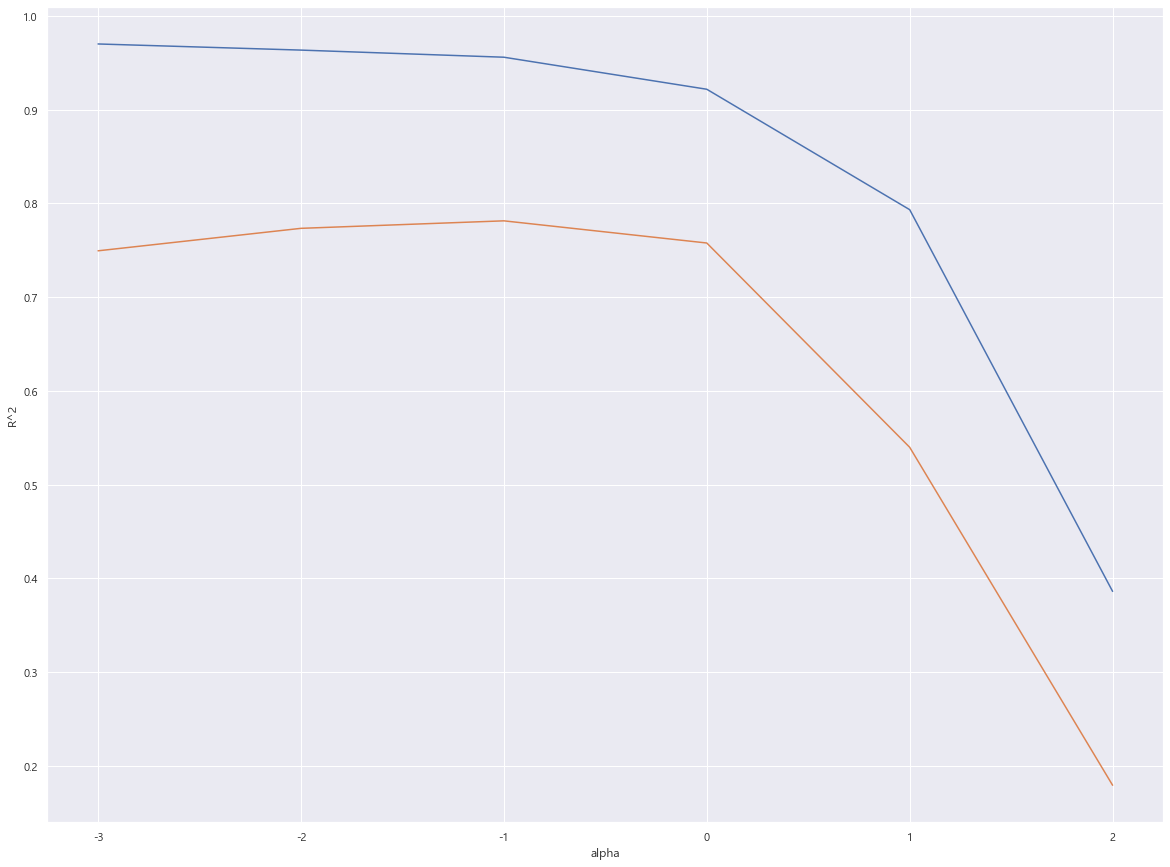

In [58]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#파랑: 훈련세트 / 주황: 테스트 세트

- standard\
alpha = 1 이 가장 적합한 것으로 판단\
0.9621042632449137\
0.7762035900661869

In [59]:
ridge = Ridge(alpha=1)
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.9218622897758613
0.7578403032747218


- minmax\
alpha = -1 이 가장 적합한 것으로 판단\
0.9560336256940162\
0.7814911272758303

In [60]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.9560336256940162
0.7814911272758303


##### 라쏘

In [61]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test)) 

0.9709109824698757
0.7411507407198432


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.007e+13, tolerance: 2.073e+11
  model = cd_fast.enet_coordinate_descent(


In [62]:
train_score = []
test_score = []

In [63]:
# 적절한 alpha값 찾기(규제강도 정하기)
alpha_list = [0.001, 0.01, 0.1 , 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델 만들기
    lasso = Lasso(alpha=alpha, max_iter=10000) # max_iter : 반복횟수 
    # 라쏘 모델 훈련
    lasso.fit(train_scaled, y_train)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+13, tolerance: 2.073e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+13, tolerance: 2.073e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

In [64]:
print(train_score)
print(test_score)

[0.9794150633134262, 0.9794148946710719, 0.9794132064677157, 0.9793960979975567, 0.9792121823032834, 0.9760892373754073]
[0.6714491133608297, 0.6714536750727811, 0.6714992869928723, 0.671961028547784, 0.6766414721301315, 0.7067770054949751]


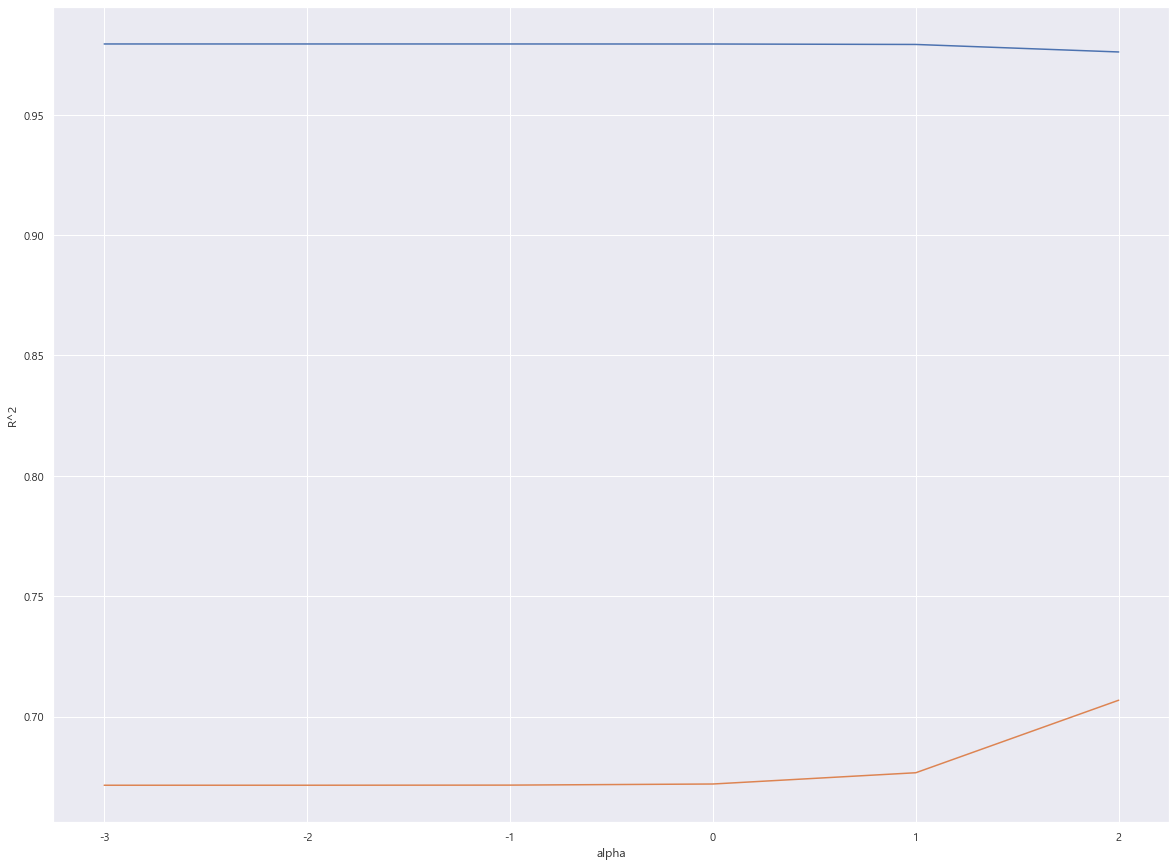

In [65]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#파랑: 훈련세트 / 주황: 테스트 세트

- standard\
alpha=100\
0.9707538157973069\
0.7421789186289193

In [66]:
# standard
lasso = Lasso(alpha=100)
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.9694576635676149
0.7495005898690971


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.433e+13, tolerance: 2.073e+11
  model = cd_fast.enet_coordinate_descent(


- minmax\
alpha = 100\
0.9694576635676149\
0.7495005898690971

In [67]:
lasso = Lasso(alpha=100)
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.9694576635676149
0.7495005898690971


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.433e+13, tolerance: 2.073e+11
  model = cd_fast.enet_coordinate_descent(


In [68]:
# 라쏘 모델의 0인 계수의 갯수
print(np.sum(lasso.coef_ == 0))

5


## ----------------------------------------------------------------------------------------------------------------------

## 표준화(Standard)

In [81]:
# Numpy 를 이용한 표준화 : z = (x - mean())/std()
df_dr_standard = (df - np.mean(df, axis=0)) / np.std(df, axis=0)
df_dr_standard

,거주자수,일평균승하차(명),1인 가구수(세대),사업체수,상가 면적,일평균(원)
0,0.339065,-0.765385,1.733581,-0.241846,-0.487547,-0.668974
1,-0.784368,-0.731520,1.191488,-0.144670,-0.490985,-0.543833
2,-1.758850,-0.935587,0.648742,0.486972,-0.525371,-0.647801
3,0.517661,0.094641,-0.741760,-0.399757,-0.398146,-0.095497
4,0.537243,-0.353403,-0.355110,0.547707,-0.470354,-0.427862
...,...,...,...,...,...,...
95,-0.303065,-0.809475,-1.166290,-0.411904,-0.490985,-0.835193
96,0.671327,0.119380,-0.997131,-0.752019,-0.267482,0.168569
97,-0.006342,1.794353,0.507667,-0.399757,0.045423,1.197545
98,0.267445,0.663411,0.939382,0.134710,-0.322498,0.749317


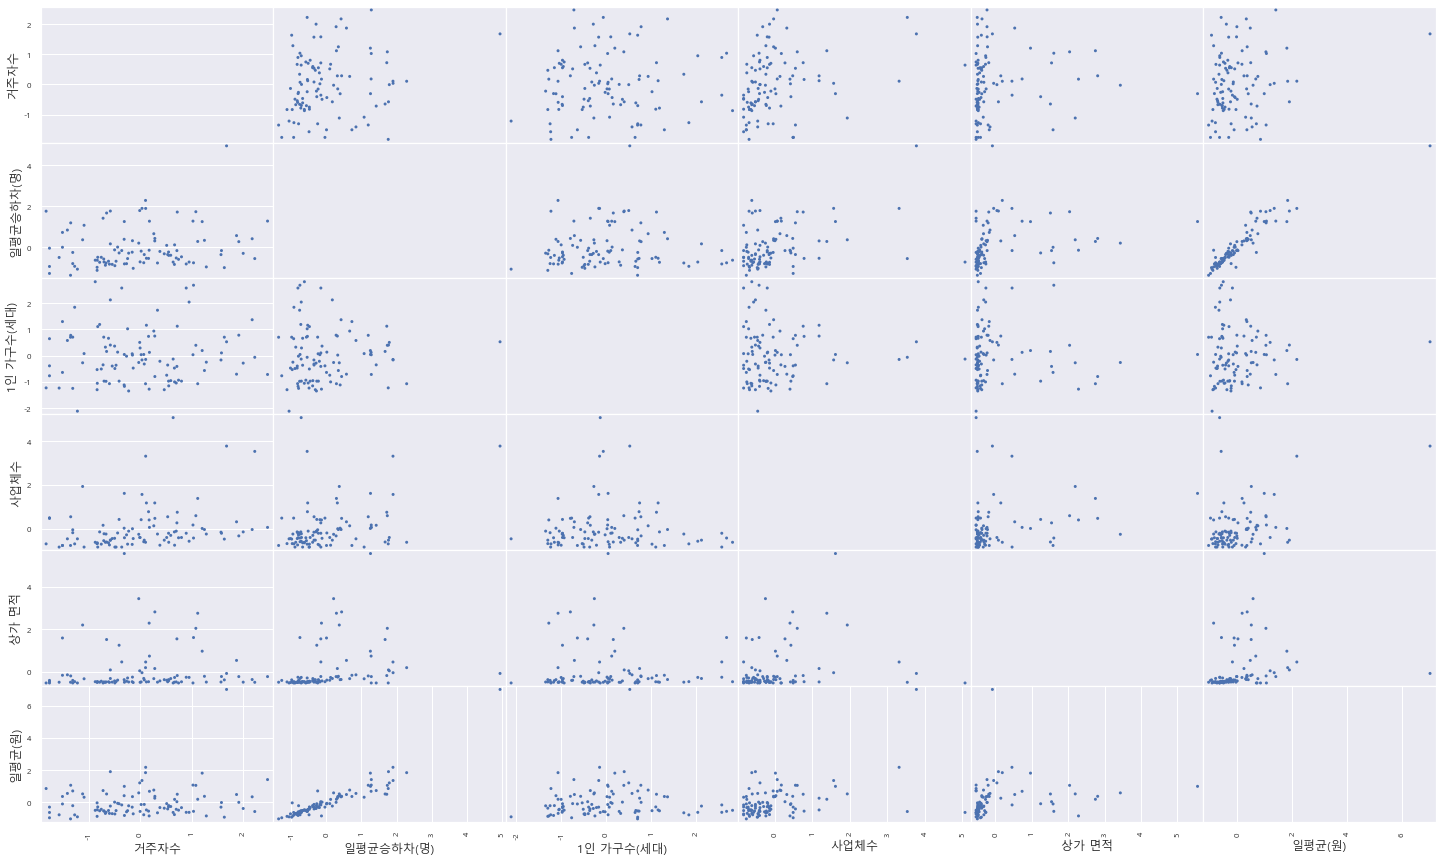

In [82]:
# 변수별 산점도
from pandas.plotting import scatter_matrix
scatter_matrix(df_dr_standard,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

### 다중회귀분석

#### 회귀모델 적합도

In [83]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [89]:
standard_x = df_dr_standard[['거주자수','일평균승하차(명)','1인 가구수(세대)','사업체수','상가 면적']]

In [90]:
standard_y = df_dr_standard[["일평균(원)"]]

In [91]:
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(standard_x, standard_y, test_size=0.3, random_state=42)

In [92]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [93]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                              89.95
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    7.51e-28
Time:                        19:55:53   Log-Likelihood:                         -34.768
No. Observations:                  70   AIC:                                      79.54
Df Residuals:                      65   BIC:                                      90.78
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.874
- Adj. R-squared : 0.864
- p-value : 일평균승하차,사업체수만 유의미

In [94]:
standard_x = df_dr_standard[["일평균승하차(명)","사업체수"]]

In [95]:
# 다시 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(standard_x, standard_y, test_size=0.3, random_state=42)

In [96]:
# 다시 회귀분석 실행
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [97]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              230.0
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    5.41e-31
Time:                        19:57:31   Log-Likelihood:                         -35.454
No. Observations:                  70   AIC:                                      74.91
Df Residuals:                      68   BIC:                                      79.40
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.871
- Adj. R-squared : 0.867
- p-value : 일평균승하차, 사업체수 모두 유의미

#### 선형 회귀

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [100]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.8711592632844679

In [101]:
multi_model.score(x_test, y_test)

0.7266426845800127

#### 예측

In [102]:
my_predict = mlr.predict(x_test)
my_predict

array([[-0.77605298],
       [ 0.34873379],
       [-0.77011794],
       [-0.59821264],
       [-1.00331525],
       [-0.17774774],
       [-0.39711608],
       [ 1.16130766],
       [-0.82634878],
       [-0.74076331],
       [-0.50231061],
       [-0.24731222],
       [-0.74046149],
       [ 1.64629313],
       [-0.12849546],
       [-0.27274102],
       [-0.2545577 ],
       [ 0.70549031],
       [-0.76082251],
       [-0.70831484],
       [ 1.30571661],
       [-0.69419031],
       [-0.28348568],
       [ 0.28255027],
       [ 1.54780472],
       [-0.09588324],
       [-0.29976702],
       [ 0.00998287],
       [-0.66404807],
       [-0.40258701]])

#### 시각화

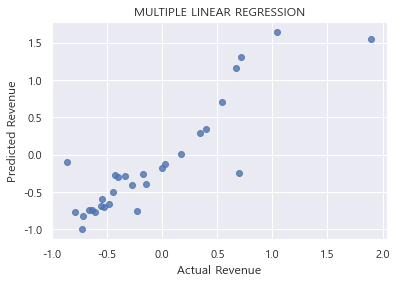

In [103]:
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

#### 상관계수 확인

In [104]:
print(mlr.coef_)

[[0.91502142 0.11531912]]


#### 라쏘 회귀 모델

In [105]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0)
lasso.fit(X=x_train, y=y_train)
print(lasso.score(X=x_train, y=y_train))
print(lasso.score(X=x_test, y=y_test))

0.8711592632844679
0.7266426845800129


C:\Users\admin\AppData\Local\Temp\ipykernel_19984\2117939037.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X=x_train, y=y_train)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.638e+00, tolerance: 8.751e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/R

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [106]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for alpha in alpha_list:  #여섯번 계산
    lasso = Lasso(alpha=alpha) #알파값 변경하면서 생성(6번)
    lasso.fit(X=x_train, y=y_train)

    train_score.append(lasso.score(X=x_train, y=y_train))
    test_score.append(lasso.score(X=x_test, y=y_test))

In [107]:
print(train_score)
print(test_score)

[0.8711583299475643, 0.8710647336730571, 0.8616942268671365, 0.17304928760208493, 0.0, 0.0]
[0.7272239568404985, 0.7324121170970215, 0.774426069861062, 0.1651162208717949, -0.05375639629839113, -0.05375639629839113]


#### (표준화)Lasso alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.8711583299475643</td>
	    <td>0.7272239568404985</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.8710647336730571</td>
	    <td>0.7324121170970215</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.8616942268671365</td>
	    <td>0.774426069861062</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.17304928760208493</td>
	    <td>0.1651162208717949</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.0</td>
	    <td>-0.05375639629839113</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.0</td>
	    <td>-0.05375639629839113</td>
	</tr>
</table>

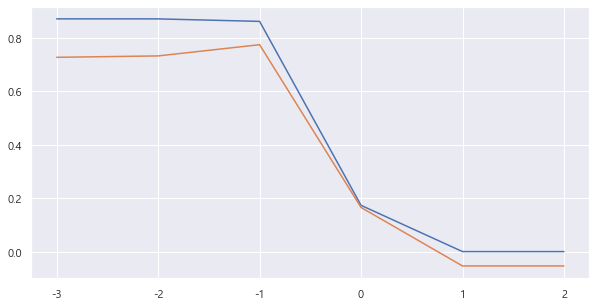

In [108]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [109]:
print(lasso.coef_) #결정계수
print(lasso.intercept_) # 절편

[0. 0.]
[0.04405346]


#### 릿지 회귀 모델

In [110]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X=x_train, y=y_train)
ridge.score(X=x_train, y=y_train)

0.8710377449109059

In [111]:
ridge.score(X=x_test, y=y_test)

0.7328920678992583

In [112]:
train_score = []
test_score = []

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [113]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:  #여섯번 계산
    ridge = Ridge(alpha=alpha) #알파값 변경하면서 생성(6번)
    ridge.fit(X=x_train, y=y_train)

    train_score.append(ridge.score(X=x_train, y=y_train))
    test_score.append(ridge.score(X=x_test, y=y_test))

In [114]:
print(train_score)
print(test_score)

[0.8711592631593683, 0.8711592507778142, 0.8711580159148196, 0.8710377449109059, 0.861598239729772, 0.63848584482297]
[0.7266492210278096, 0.7267080225550469, 0.7272934205784547, 0.7328920678992583, 0.7685623891744064, 0.6405705168388045]


In [115]:
print(ridge.coef_) #결정계수
print(ridge.intercept_) # 절편

[[0.40730715 0.13828403]]
[0.00977827]


#### (표준화)Ridge alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.8711592631593683</td>
	    <td>0.7266492210278096</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.8711592507778142</td>
	    <td>0.7267080225550469</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.8711580159148196</td>
	    <td>0.7272934205784547</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.8710377449109059</td>
	    <td>0.7328920678992583</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.861598239729772</td>
	    <td>0.7685623891744064</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.63848584482297</td>
	    <td>0.6405705168388045</td>
	</tr>
</table>

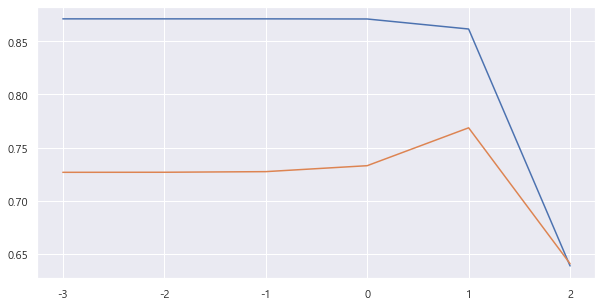

In [116]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

## MinMaxScaler(정규화)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
df.max()

역사명                화명역
거주자수             48795
일평균승하차(명)        57826
1인 가구수(세대)        7952
사업체수               487
상가 면적           1767.0
일평균(원)        39388852
dtype: object

In [40]:
df.min()

역사명             가야역
거주자수           1355
일평균승하차(명)       346
1인 가구수(세대)      404
사업체수              0
상가 면적           0.0
일평균(원)        86682
dtype: object

In [41]:
df.drop(["역사명"],axis=1,inplace=True)

In [42]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [43]:
df_scaled = scaler.transform(df)

In [44]:
minmaxscaled_df = pd.DataFrame(df_scaled, columns=df.columns)
minmaxscaled_df

,거주자수,일평균승하차(명),1인 가구수(세대),사업체수,상가 면적,일평균(원)
0,0.502993,0.094868,0.779942,0.100616,0.006225,0.046801
1,0.241779,0.100226,0.669979,0.117043,0.005659,0.062298
2,0.015198,0.067937,0.559883,0.223819,0.000000,0.049423
3,0.544519,0.230950,0.277822,0.073922,0.020939,0.117815
4,0.549073,0.160056,0.356253,0.234086,0.009055,0.076658
...,...,...,...,...,...,...
95,0.353689,0.087891,0.191706,0.071869,0.005659,0.026219
96,0.580249,0.234864,0.226020,0.014374,0.042445,0.150515
97,0.422681,0.499896,0.531267,0.073922,0.093945,0.277933
98,0.486341,0.320946,0.618839,0.164271,0.033390,0.222429


In [45]:
print(minmaxscaled_df.max())
print(minmaxscaled_df.min())

거주자수          1.0
일평균승하차(명)     1.0
1인 가구수(세대)    1.0
사업체수          1.0
상가 면적         1.0
일평균(원)        1.0
dtype: float64
거주자수          0.0
일평균승하차(명)     0.0
1인 가구수(세대)    0.0
사업체수          0.0
상가 면적         0.0
일평균(원)        0.0
dtype: float64


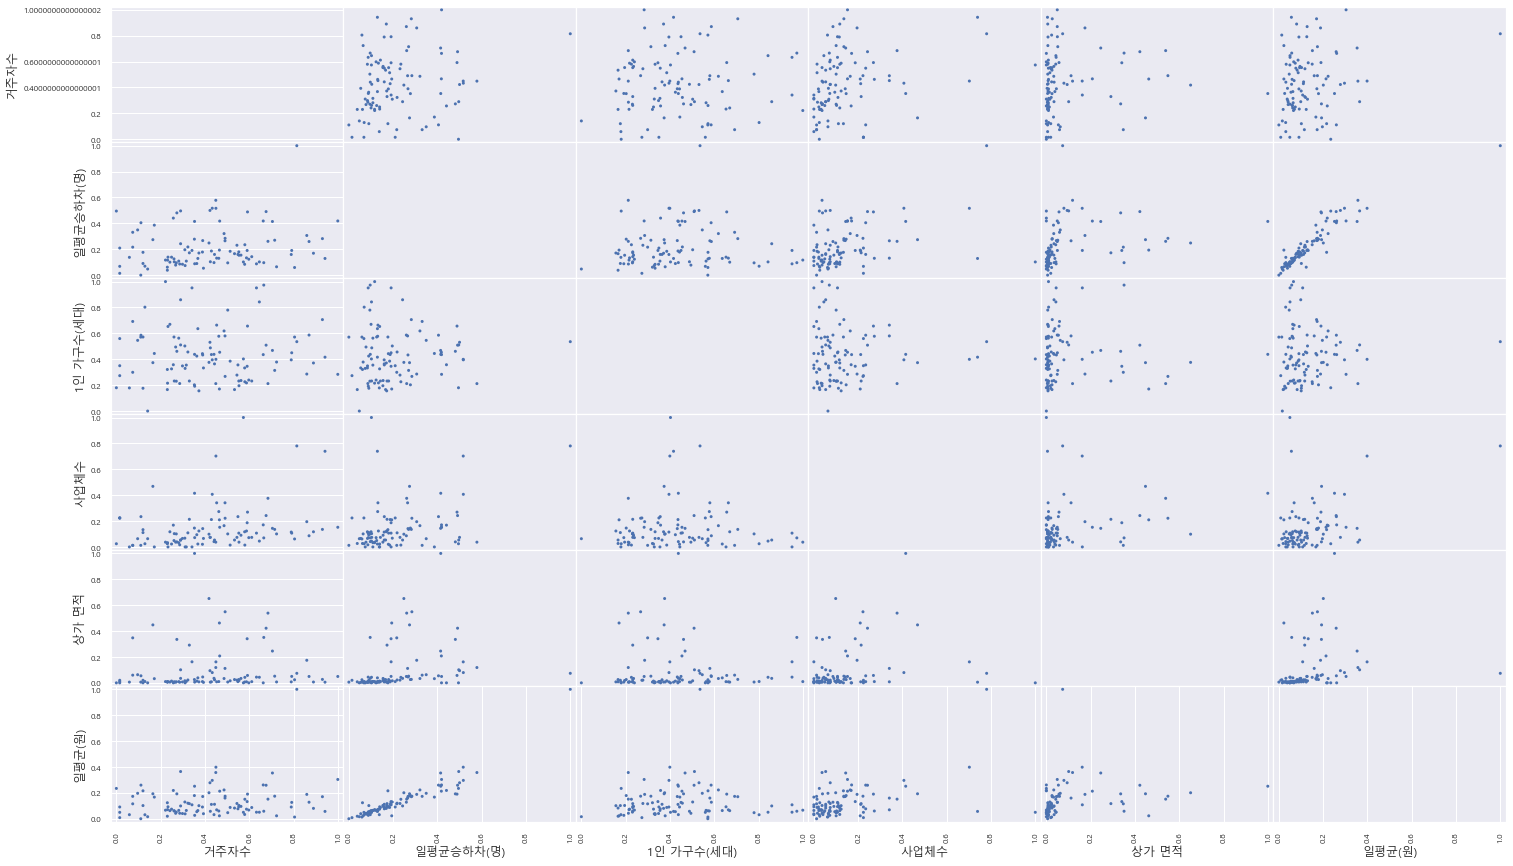

In [46]:
# 변수별 산점도
from pandas.plotting import scatter_matrix
scatter_matrix(minmaxscaled_df,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

### 상관계수 확인

In [47]:
df_minmaxscale_corr = minmaxscaled_df.corr()
df_minmaxscale_corr

,거주자수,일평균승하차(명),1인 가구수(세대),사업체수,상가 면적,일평균(원)
거주자수,1.000000,0.177225,0.041797,0.278248,0.071730,0.199948
일평균승하차(명),0.177225,1.000000,0.033473,0.355560,0.300601,0.919696
1인 가구수(세대),0.041797,0.033473,1.000000,-0.011647,-0.032205,0.036853
사업체수,0.278248,0.355560,-0.011647,1.000000,0.234948,0.420679
상가 면적,0.071730,0.300601,-0.032205,0.234948,1.000000,0.238792
일평균(원),0.199948,0.919696,0.036853,0.420679,0.238792,1.000000


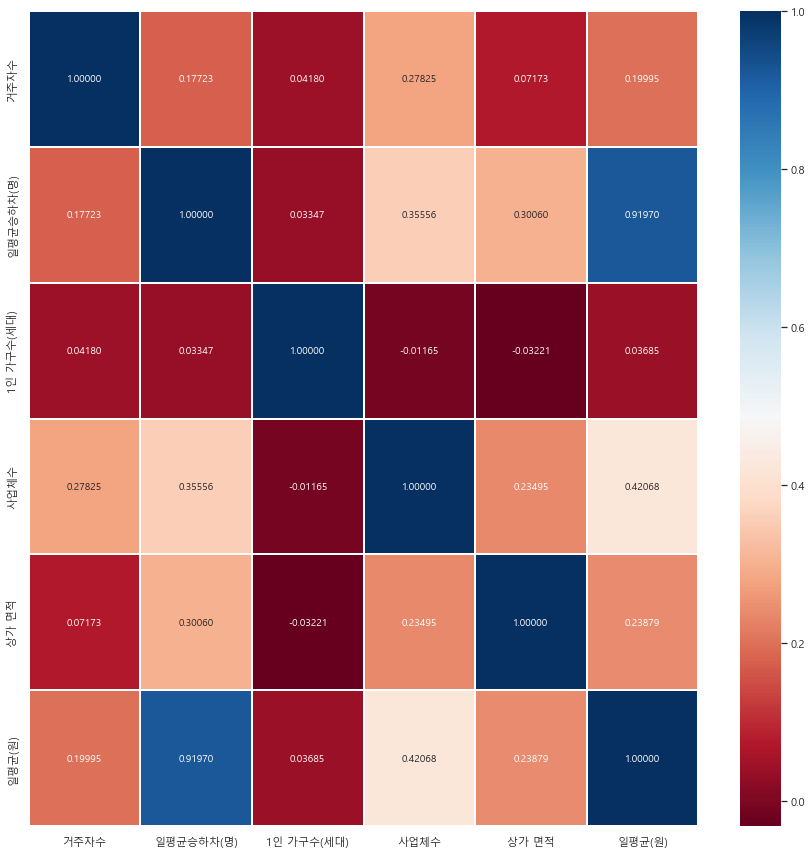

In [48]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(df_minmaxscale_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

### 다중회귀분석

#### 회귀모델 적합도

In [49]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [50]:
minmaxscale_x = minmaxscaled_df[['거주자수','일평균승하차(명)','1인 가구수(세대)','사업체수','상가 면적']]

In [51]:
minmaxscale_y = minmaxscaled_df[['일평균(원)']]

In [52]:
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(minmaxscale_x, minmaxscale_y, test_size=0.3, random_state=42)

In [53]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [54]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              169.7
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    6.58e-36
Time:                        19:38:57   Log-Likelihood:                          108.17
No. Observations:                  70   AIC:                                     -206.3
Df Residuals:                      65   BIC:                                     -195.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.929
- Adj. R-squared : 0.923
- p-value : 일평균 승하차, 1인 가구수, 사업체수만 유의미

In [57]:
minmaxscale_x = minmaxscaled_df[["일평균승하차(명)","1인 가구수(세대)","사업체수"]]

In [58]:
# 다시 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(minmaxscale_x, minmaxscale_y, test_size=0.3, random_state=42)

In [59]:
# 다시 회귀분석 실행
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [60]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              288.5
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    3.11e-38
Time:                        19:39:58   Log-Likelihood:                          107.83
No. Observations:                  70   AIC:                                     -209.7
Df Residuals:                      67   BIC:                                     -202.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.928
- Adj. R-squared : 0.925
- p-value : 모두 유의미

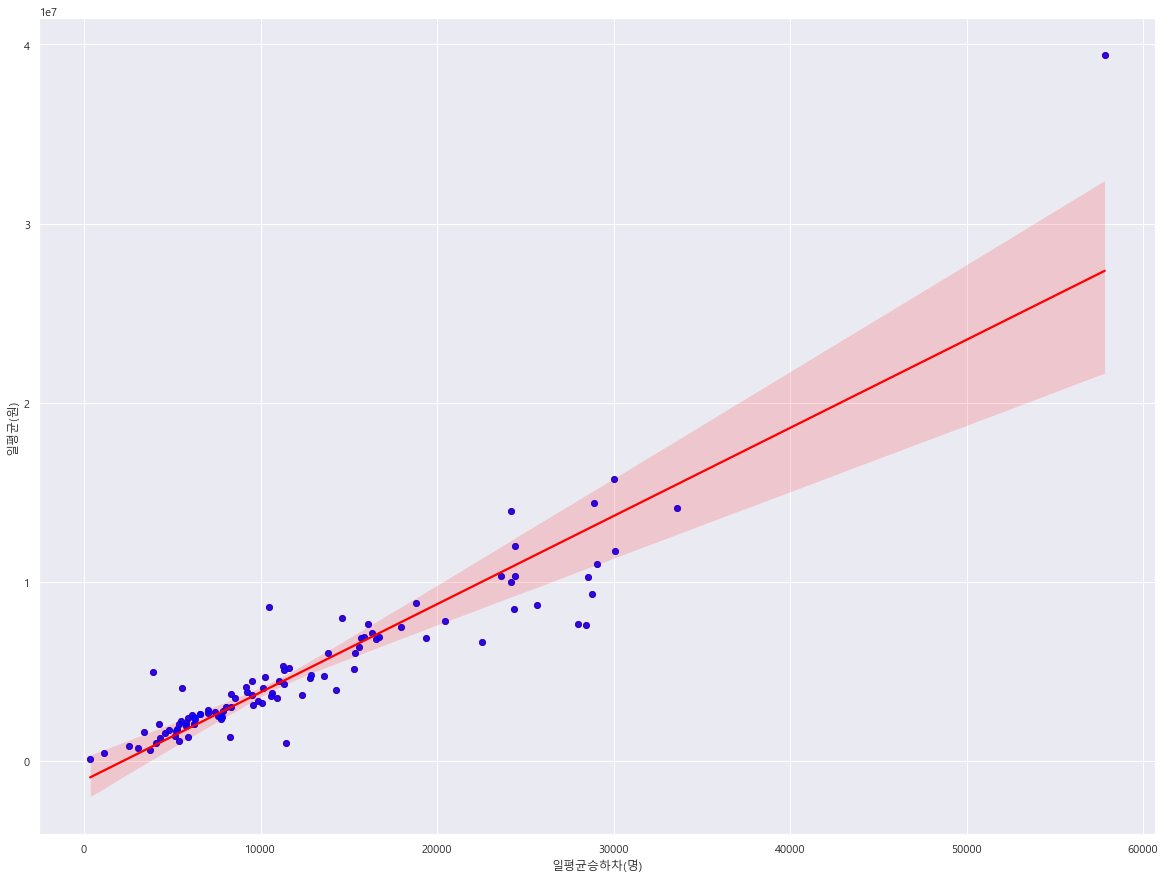

In [19]:
plt.figure(figsize=(20,15))
sns.regplot(x='일평균승하차(명)', y='일평균(원)', data=df, color="red")
plt.scatter(df[['일평균승하차(명)']], df[['일평균(원)']], alpha=0.8, color='blue')
plt.show()

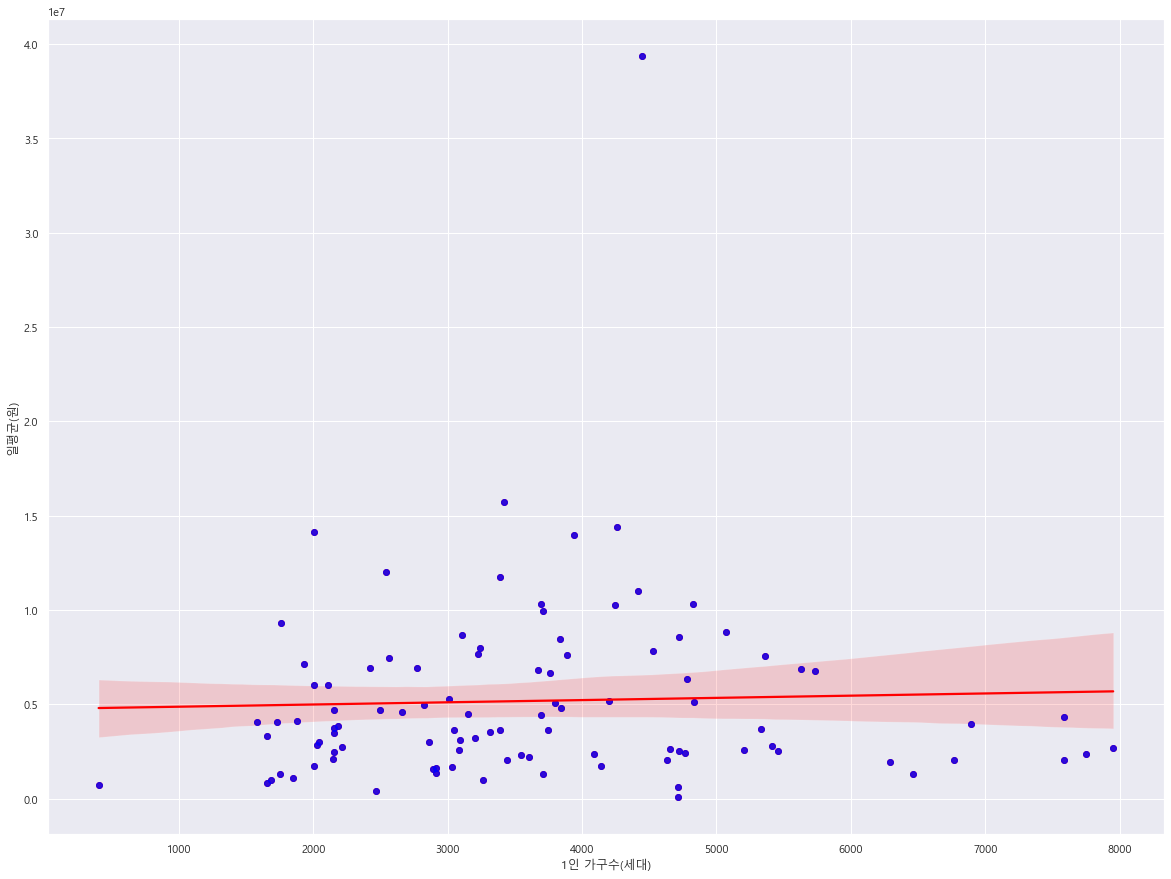

In [20]:
plt.figure(figsize=(20,15))
sns.regplot(x='1인 가구수(세대)', y='일평균(원)', data=df, color="red")
plt.scatter(df[['1인 가구수(세대)']], df[['일평균(원)']], alpha=0.8, color='blue')
plt.show()

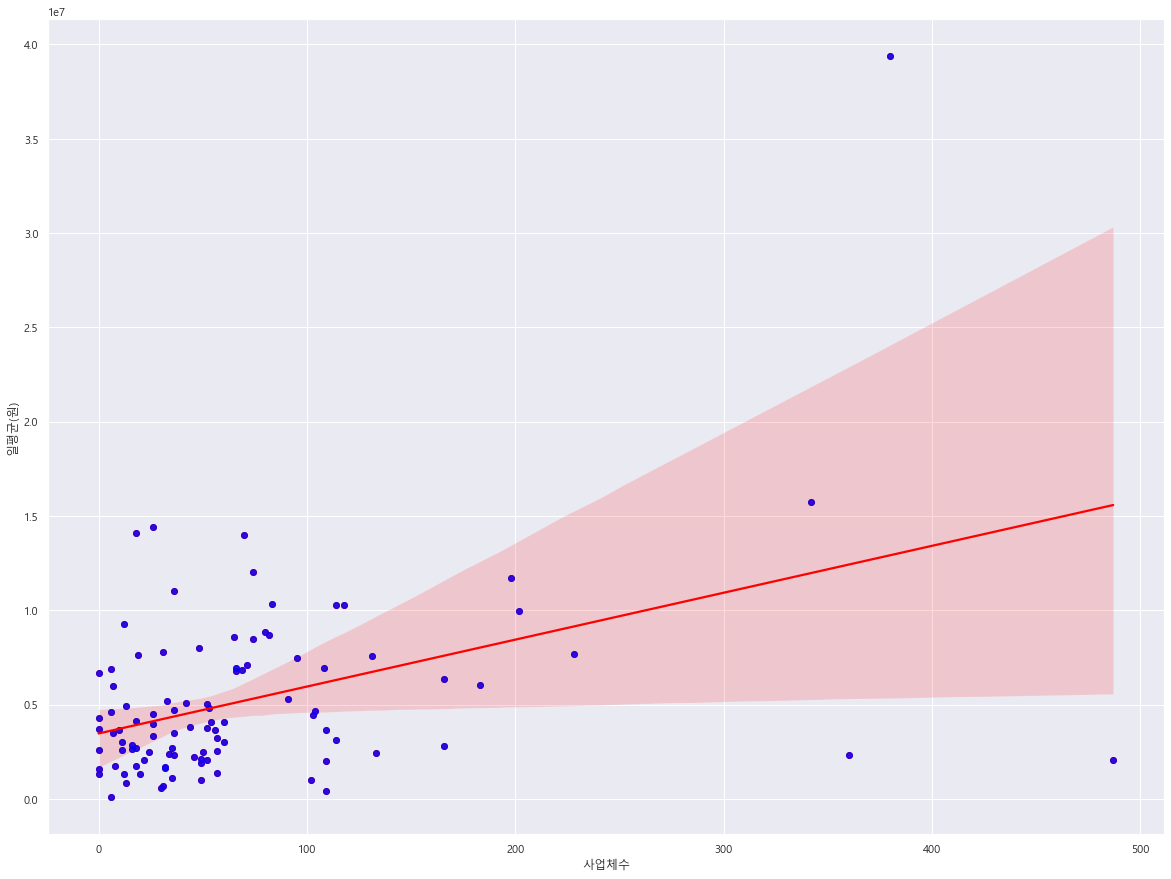

In [21]:
plt.figure(figsize=(20,15))
sns.regplot(x='사업체수', y='일평균(원)', data=df, color="red")
plt.scatter(df[['사업체수']], df[['일평균(원)']], alpha=0.8, color='blue')
plt.show()

#### 선형 회귀

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [63]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.8711747785020669

In [64]:
multi_model.score(x_test, y_test)

0.7268469556284333

#### 예측

In [65]:
my_predict = mlr.predict(x_test)
my_predict

array([[0.03349975],
       [0.17221459],
       [0.03426939],
       [0.05590152],
       [0.00512138],
       [0.10779083],
       [0.08026997],
       [0.27348593],
       [0.02707597],
       [0.03878377],
       [0.06686542],
       [0.09935433],
       [0.03740822],
       [0.33368367],
       [0.11348583],
       [0.09565009],
       [0.09943379],
       [0.21727708],
       [0.03474638],
       [0.04224477],
       [0.29112007],
       [0.04314153],
       [0.09439593],
       [0.1646122 ],
       [0.32149286],
       [0.11707265],
       [0.09234245],
       [0.13032685],
       [0.04683155],
       [0.07926139]])

#### 시각화

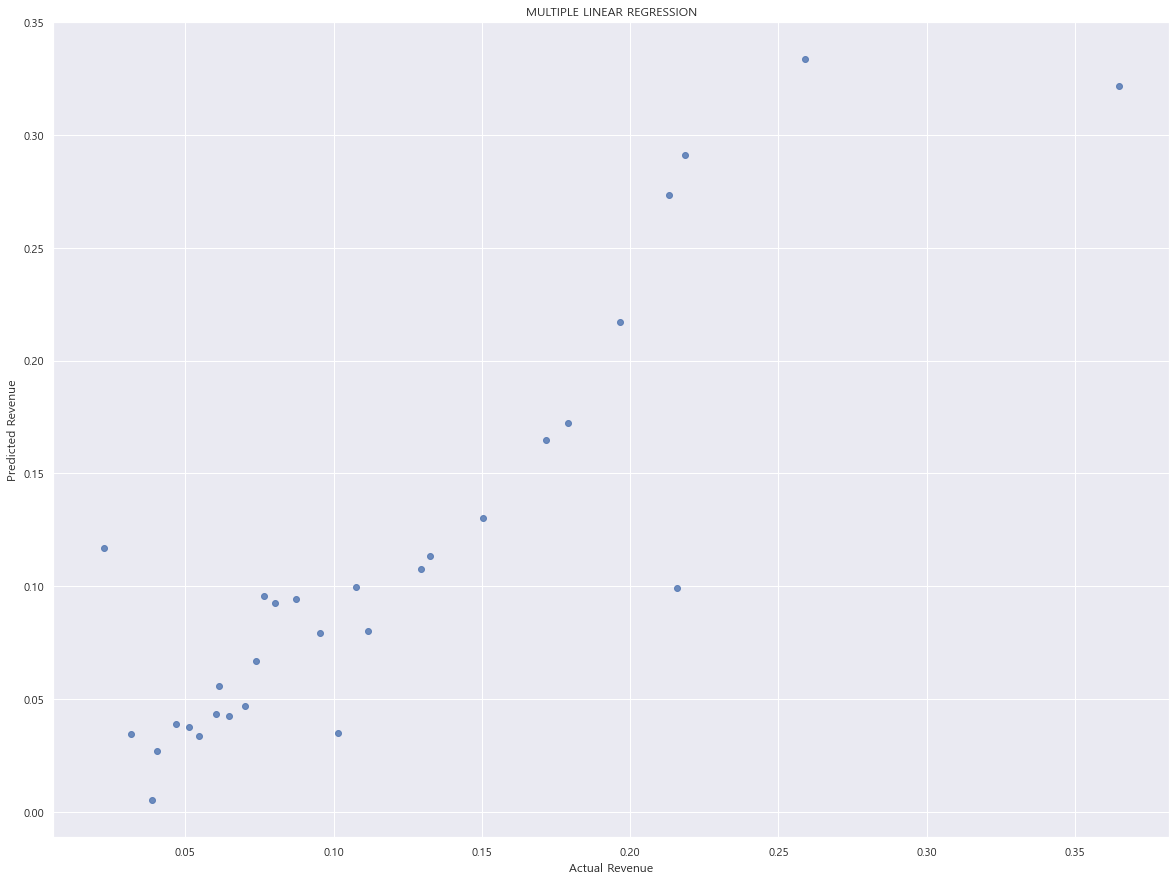

In [66]:
plt.figure(figsize=(20,15))
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

#### 상관계수 확인

In [67]:
print(mlr.coef_)

[[0.71611042 0.00257231 0.08447165]]


#### 라쏘 회귀 모델

In [75]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0)
lasso.fit(X=x_train, y=y_train)
print(lasso.score(X=x_train, y=y_train))
print(lasso.score(X=x_test, y=y_test))

0.8711747785020669
0.7268469556284329


C:\Users\admin\AppData\Local\Temp\ipykernel_19984\2117939037.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X=x_train, y=y_train)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.644e-02, tolerance: 1.342e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/R

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [76]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for alpha in alpha_list:  #여섯번 계산
    lasso = Lasso(alpha=alpha) #알파값 변경하면서 생성(6번)
    lasso.fit(X=x_train, y=y_train)

    train_score.append(lasso.score(X=x_train, y=y_train))
    test_score.append(lasso.score(X=x_test, y=y_test))

In [77]:
print(train_score)
print(test_score)

[0.8688282508182219, 0.6802001248948124, 0.0, 0.0, 0.0, 0.0]
[0.7534958160260992, 0.7266360273681028, -0.05375639629839157, -0.05375639629839157, -0.05375639629839157, -0.05375639629839157]


In [78]:
print(lasso.coef_) #결정계수
print(lasso.intercept_) # 절편

[ 0. -0.  0.]
[0.13509576]


##### (정규화)Lasso alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.8688282508182219</td>
	    <td>0.7534958160260992</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.6802001248948124</td>
	    <td>0.7266360273681028</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.0</td>
	    <td>-0.05375639629839157</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.0</td>
	    <td> -0.05375639629839157</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.0</td>
	    <td>-0.05375639629839157</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.0</td>
	    <td> -0.05375639629839157</td>
	</tr>
</table>

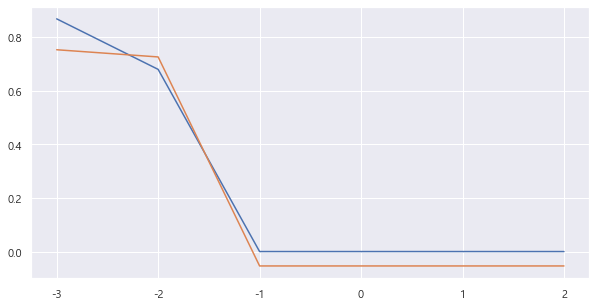

In [79]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

#### 릿지 회귀 모델

In [68]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X=x_train, y=y_train)
ridge.score(X=x_train, y=y_train)

0.7881599906999417

In [69]:
ridge.score(X=x_test, y=y_test)

0.7617112115161908

In [70]:
train_score = []
test_score = []

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [71]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:  #여섯번 계산
    ridge = Ridge(alpha=alpha) #알파값 변경하면서 생성(6번)
    ridge.fit(X=x_train, y=y_train)

    train_score.append(ridge.score(X=x_train, y=y_train))
    test_score.append(ridge.score(X=x_test, y=y_test))

In [72]:
print(train_score)
print(test_score)

[0.871174577566307, 0.8711548953469409, 0.8693786621431661, 0.7881599906999417, 0.31433492328839086, 0.043434566928711726]
[0.7271080725562011, 0.7294157705923525, 0.7486850827548219, 0.7617112115161908, 0.2962166128373942, -0.005149200479365179]


In [73]:
print(ridge.coef_) #결정계수
print(ridge.intercept_) # 절편

[[ 1.49758858e-02 -2.30124717e-05  7.93841263e-03]]
[0.13049262]


##### (정규화)Ridge alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.871174577566307</td>
	    <td>0.7271080725562011</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.8711548953469409</td>
	    <td>0.7294157705923525</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.8693786621431661</td>
	    <td>0.7486850827548219</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.7881599906999417</td>
	    <td>0.7617112115161908</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.31433492328839086</td>
	    <td>0.2962166128373942</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.043434566928711726</td>
	    <td>-0.005149200479365179</td>
	</tr>
</table>

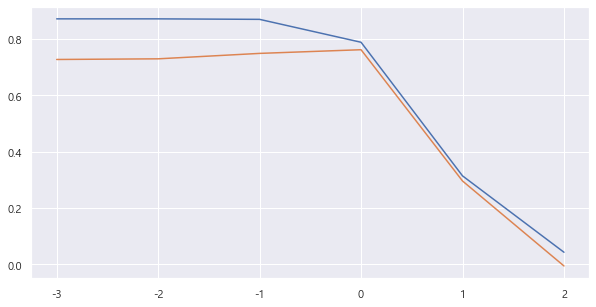

In [74]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [62]:
ridge = Ridge(alpha=0.01)
ridge.fit(X=x_train, y=y_train)
print(ridge.score(X=x_train, y=y_train))
print(ridge.score(X=x_test, y=y_test))


0.9405509316796355
0.9020595446600363


train_score와 test_score값이 떨어지기 전 + 일치할 때인, alpha가 0.01일떄 가장 최적화됐다.\
(train,test의 차이가 가장 적고 높은 점수인 0.01)

#### Min-max scaler로 정규화한 데이터를 가지고 Ridge모델을 사용하는 것이 가장 좋은 결과가 나옴

#### 모델 저장

In [63]:
import pickle

In [80]:
# 모델 저장
filename = 'saved_ridge_model(alpha=0.01).sav'
pickle.dump(ridge, open(filename, 'wb')) # w:쓰기, r:읽기

In [81]:
# 모델 불러오기
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

Ridge(alpha=0.01)

#### 예측

예측 정확도가 위의 모델(0.01)의 train과 test 범위 사이에 있거나 train_score보다 높으면 됨